<a href="https://colab.research.google.com/github/blackcrowX/Data_Analytics_Projects/blob/main/Python/Automate_API_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automate API Data

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
type(data)

dict

In [4]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#This normalizes the data and makes it all pretty in a dataframe


In [5]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

<ipython-input-5-7ca7f5bd7fbb>:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10223,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.938265e+07,1.938265e+07,False,NaN,1,NaN,NaN,None,2023-05-24T21:28:00.000Z,26404.625064,1.613668e+10,17.9387,0.062796,-3.001549,-3.737553,-3.410708,-3.716094,10.078954,5.117916e+11,46.1325,5.544971e+11,None,2023-05-24T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-24 21:30:39.489484
1,1027,Ethereum,ETH,ethereum,6940,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202628e+08,1.202628e+08,True,NaN,2,NaN,NaN,None,2023-05-24T21:28:00.000Z,1804.758981,7.005197e+09,3.4420,0.233331,-2.636696,-1.254303,-1.399025,3.954489,9.094727,2.170453e+11,19.5614,2.170453e+11,None,2023-05-24T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-24 21:30:39.489484
2,825,Tether,USDT,tether,54434,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.302692e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-05-24T21:28:00.000Z,0.999956,2.498525e+10,16.5306,0.005089,-0.006924,-0.026398,-0.008819,-0.079710,-0.017966,8.302326e+10,7.4825,8.608684e+10,None,2023-05-24T21:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-24 21:30:39.489484
3,1839,BNB,BNB,bnb,1407,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558578e+08,1.558578e+08,False,NaN,4,NaN,NaN,None,2023-05-24T21:28:00.000Z,306.176284,4.129572e+08,15.6142,0.007258,-2.332762,-2.542756,-7.564033,-5.085372,-1.111524,4.771996e+10,4.3014,4.771996e+10,None,2023-05-24T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-24 21:30:39.489484
4,3408,USD Coin,USDC,usd-coin,12646,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.915970e+10,2.915970e+10,False,NaN,5,NaN,NaN,None,2023-05-24T21:28:00.000Z,1.000093,3.213255e+09,8.0923,0.002901,0.011887,-0.002599,0.026264,0.030252,0.007159,2.916240e+10,2.6283,2.916240e+10,None,2023-05-24T21:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-24 21:30:39.489484
5,52,XRP,XRP,xrp,954,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.187315e+10,9.998893e+10,False,NaN,6,NaN,NaN,None,2023-05-24T21:28:00.000Z,0.453884,1.034168e+09,24.9487,-0.079655,-2.296110,1.548806,-1.591725,-0.263426,16.382074,2.354438e+10,2.1220,4.538837e+10,None,2023-05-24T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-24 21:30:39.489484
6,2010,Cardano,ADA,cardano,792,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.487135e+10,3.581044e+10,False,NaN,7,NaN,NaN,None,2023-05-24T21:28:00.000Z,0.364503,1.758218e+08,21.7928,0.070021,-1.814026,-3.054104,-4.731807,3.397477,-5.065717,1.271070e+10,1.1456,1.640262e+10,None,2023-05-24T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-24 21:30:39.489484
7,74,Dogecoin,DOGE,dogecoin,715,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.394821e+11,1.394821e+11,True,NaN,8,NaN,NaN,None,2023-05-24T21:28:00.000Z,0.071001,2.391784e+08,49.7865,0.070649,-2.475205,-5.598671,-9.360294,-3.821337,-15.936183,9.903398e+09,0.8927,9.903398e+09,None,2023-05-24T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-24 21:30:39.489484
8,3890,Polygon,MATIC,polygon,714,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+

In [ ]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df.to_csv

    if not os.path.isfile(r'API.csv'):
        df.to_csv(r'API.csv', header='column_names')
    else:
        df.to_csv(r'API.csv', mode='a', header=False)
        
    df = pd.read_csv(r'API.csv')


In [ ]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

<ipython-input-22-b0d6b6172896>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-22-b0d6b6172896>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-22-b0d6b6172896>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


<ipython-input-22-b0d6b6172896>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


KeyboardInterrupt: ignored

In [6]:
df = pd.read_csv(r'API.csv')

In [8]:
df.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10221,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.938090e+07,1.938090e+07,False,NaN,1,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,26862.124528,1.105825e+10,27.8827,-0.096109,0.283558,-1.538560,-3.405530,-5.437025,10.242323,5.206121e+11,46.3202,5.641046e+11,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
1,1,1027,Ethereum,ETH,ethereum,6933,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202694e+08,1.202694e+08,True,NaN,2,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,1818.543805,4.542779e+09,34.5224,-0.118957,0.655207,-0.175288,-2.978738,-0.045727,10.039635,2.187152e+11,19.4596,2.187152e+11,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
2,2,825,Tether,USDT,tether,53878,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.291908e+10,8.609064e+10,True,NaN,3,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,1.000240,1.721939e+10,27.3256,0.014066,0.005399,0.000841,0.004725,-0.109403,0.009163,8.293895e+10,7.3793,8.611127e+10,NaN,2023-05-22T23:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-22 23:33:38.903284
3,3,1839,BNB,BNB,bnb,1387,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558582e+08,1.558582e+08,False,NaN,4,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,309.308027,3.553439e+08,16.5540,-0.144922,0.798259,-1.531313,-6.878901,-6.188774,-0.470070,4.820818e+10,4.2892,4.820818e+10,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
4,4,3408,USD Coin,USDC,usd-coin,12582,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.942094e+10,2.942094e+10,False,NaN,5,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,1.000030,2.590226e+09,46.4724,0.006447,0.017303,0.003913,-0.006221,0.067586,0.009729,2.942181e+10,2.6177,2.942181e+10,NaN,2023-05-22T23:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-22 23:33:38.903284


# Let's change the scientific notation.

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10221,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19380900.00000,19380900.00000,False,NaN,1,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,26862.12453,11058254668.72815,27.88270,-0.09611,0.28356,-1.53856,-3.40553,-5.43702,10.24232,520612149269.25934,46.32020,564104615092.92004,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
1,1,1027,Ethereum,ETH,ethereum,6933,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120269409.46943,120269409.46943,True,NaN,2,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,1818.54380,4542779416.22881,34.52240,-0.11896,0.65521,-0.17529,-2.97874,-0.04573,10.03964,218715189502.54510,19.45960,218715189502.54999,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
2,2,825,Tether,USDT,tether,53878,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,82919078535.20427,86090638895.05328,True,NaN,3,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,1.00024,17219385542.31306,27.32560,0.01407,0.00540,0.00084,0.00472,-0.10940,0.00916,82938947675.13895,7.37930,86111268006.97000,NaN,2023-05-22T23:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-22 23:33:38.903284
3,3,1839,BNB,BNB,bnb,1387,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155858168.20289,155858168.20289,False,NaN,4,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,309.30803,355343864.36980,16.55400,-0.14492,0.79826,-1.53131,-6.87890,-6.18877,-0.47007,48208182450.36217,4.28920,48208182450.36000,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
4,4,3408,USD Coin,USDC,usd-coin,12582,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,29420939250.75391,29420939250.75391,False,NaN,5,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,1.00003,2590226306.60551,46.47240,0.00645,0.01730,0.00391,-0.00622,0.06759,0.00973,29421814986.77433,2.61770,29421814986.77000,NaN,2023-05-22T23:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-22 23:33:38.903284
5,5,52,XRP,XRP,xrp,951,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51873152538.00000,99988934739.00000,False,NaN,6,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,0.46188,904844608.06301,69.54240,0.19718,0.69178,7.75460,-2.23965,3.71005,18.13383,23959363175.50993,2.13170,46188369133.64000,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
6,6,2010,Cardano,ADA,cardano,790,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34863111584.60900,35810438256.57800,False,NaN,7,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,0.36777,177662090.22555,52.37020,-0.38713,1.87294,-0.27266,-7.10491,-1.24913,-5.95148,12821713034.97151,1.14070,16549787450.08000,NaN,2023-05-22T23:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-22 23:33:38.903284
7,7,74,Dogecoin,DOGE,dogecoin,711,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139456066383.70523,139456066383.70523,True,NaN,8,NaN,NaN,NaN,2023-05-22T23:31:00.000Z,0.07302,210148362.51199,47.98360,-0.05111,1.06130,1.01673,-9.13168,-5.69006,-14.30311,10183772604.95264,0.90610,10183772604.95000,NaN,2023-05-22T23:31:00.0

# Now let's look at the coin trends over time

In [11]:
df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.07711,0.28563,-1.52875,-3.46555,-5.47034,10.18525
Ethereum,-0.09049,0.63455,-0.15185,-3.03838,-0.07489,9.97252
Tether,0.00780,-0.00446,-0.00863,0.00140,-0.10556,0.00316
BNB,-0.11884,0.80387,-1.51589,-6.89852,-6.20394,-0.54179
USD Coin,0.00981,0.00432,-0.00339,-0.01343,0.07841,-0.00230
XRP,0.20401,0.69443,7.77385,-2.26868,3.65287,18.05934
Cardano,-0.35359,1.87307,-0.25219,-7.14567,-1.27512,-5.99969
Dogecoin,-0.04808,1.07835,1.03715,-9.15701,-5.71818,-14.36881
Polygon,-0.11850,1.64090,0.98126,-14.94563,-23.12333,-36.80534


In [20]:
df3 = df2.stack()
df3

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.07711
             quote.USD.percent_change_24h     0.28563
             quote.USD.percent_change_7d     -1.52875
             quote.USD.percent_change_30d    -3.46555
             quote.USD.percent_change_60d    -5.47034
             quote.USD.percent_change_90d    10.18525
Ethereum     quote.USD.percent_change_1h     -0.09049
             quote.USD.percent_change_24h     0.63455
             quote.USD.percent_change_7d     -0.15185
             quote.USD.percent_change_30d    -3.03838
             quote.USD.percent_change_60d    -0.07489
             quote.USD.percent_change_90d     9.97252
Tether       quote.USD.percent_change_1h      0.00780
             quote.USD.percent_change_24h    -0.00446
             quote.USD.percent_change_7d     -0.00863
             quote.USD.percent_change_30d     0.00140
             quote.USD.percent_change_60d    -0.10556
             quote.USD.percent_change_90

In [21]:
type(df3)

pandas.core.series.Series

In [22]:
df4 = df3.to_frame(name='values')
df4

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.07711
            quote.USD.percent_change_24h   0.28563
            quote.USD.percent_change_7d   -1.52875
            quote.USD.percent_change_30d  -3.46555
            quote.USD.percent_change_60d  -5.47034
            quote.USD.percent_change_90d  10.18525
Ethereum    quote.USD.percent_change_1h   -0.09049
            quote.USD.percent_change_24h   0.63455
            quote.USD.percent_change_7d   -0.15185
            quote.USD.percent_change_30d  -3.03838
            quote.USD.percent_change_60d  -0.07489
            quote.USD.percent_change_90d   9.97252
Tether      quote.USD.percent_change_1h    0.00780
            quote.USD.percent_change_24h  -0.00446
            quote.USD.percent_change_7d   -0.00863
            quote.USD.percent_change_30d   0.00140
            quote.USD.percent_change_60d  -0.10556
            quote.USD.percent_change_90d   0.00316
BNB         quote.USD.percent_change_1h   -0.11884
            quote.USD.percent_change_24h   0.80387
            quote.USD.percent_change_7d   -1.51589
            quote.USD.percent_change_30d  -6.89852
            quote.USD.percent_change_60d  -6.20394
            quote.USD.percent_change_90d  -0.54179
USD Coin    quote.USD.percent_change_1h    0.00981
            quote.USD.percent_change_24h   0.00432
            quote.USD.percent_change_7d   -0.00339
            quote.USD.percent_change_30d  -0.01343
            quote.USD.percent_change_60d   0.07841
            quote.USD.percent_change_90d  -0.00230
XRP         quote.USD.percent_change_1h    0.20401
            quote.USD.percent_change_24h   0.69443
            quote.USD.percent_change_7d    7.77385
            quote.USD.percent_change_30d  -2.26868
            quote.USD.percent_change_60d   3.65287
            quote.USD.percent_change_90d  18.05934
Cardano     quote.USD.percent_change_1h   -0.35359
            quote.USD.percent_change_24h   1.87307
            quote.USD.percent_change_7d   -0.25219
            quote.USD.percent_change_30d  -7.14567
            quote.USD.percent_change_60d  -1.27512
            quote.USD.percent_change_90d  -5.99969
Dogecoin    quote.USD.percent_change_1h   -0.04808
            quote.USD.percent_change_24h   1.07835
            quote.USD.percent_change_7d    1.03715
            quote.USD.percent_change_30d  -9.15701
            quote.USD.percent_change_60d  -5.71818
            quote.USD.percent_change_90d -14.36881
Polygon     quote.USD.percent_change_1h   -0.11850
            quote.USD.percent_change_24h   1.64090
            quote.USD.percent_change_7d    0.98126
            quote.USD.percent_change_30d -14.94563
            quote.USD.percent_change_60d -23.12333
            quote.USD.percent_change_90d -36.80534
Solana      quote.USD.percent_change_1h   -0.43529
            quote.USD.percent_change_24h  -0.48074
            quote.USD.percent_change_7d   -7.12517
            quote.USD.percent_change_30d -10.33913
            quote.USD.percent_change_60d -11.83894
            quote.USD.percent_change_90d -21.00090
TRON        quote.USD.percent_change_1h   -0.35017
            quote.USD.percent_change_24h   3.83612
            quote.USD.percent_change_7d   10.96427
            quote.USD.percent_change_30d  18.34312
            quote.USD.percent_change_60d  19.50831
            quote.USD.percent_change_90d  12.68575
Litecoin    quote.USD.percent_change_1h   -0.04925
            quote.USD.percent_change_24h  -1.63201
            quote.USD.percent_change_7d    3.91933
            quote.USD.percent_change_30d   4.44157
            quote.USD.percent_change_60d  -2.84004
            quote.USD.percent_change_90d  -2.61303
Polkadot    quote.USD.percent_change_1h   -0.02038
            quote.USD.percent_change_24h   0.61545
            quote.USD.percent_change_7d   -0.38496
            quote.USD.percent_change_30d -10.71777
            quote.USD.percent_change_60d -15.87912
            quo

In [23]:
df4.count()

values    90
dtype: int64

In [36]:
df5 = df4.reset_index()

In [37]:
df6 = df5.rename(columns = {'level_1':'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.07711
1,Bitcoin,quote.USD.percent_change_24h,0.28563
2,Bitcoin,quote.USD.percent_change_7d,-1.52875
3,Bitcoin,quote.USD.percent_change_30d,-3.46555
4,Bitcoin,quote.USD.percent_change_60d,-5.47034
5,Bitcoin,quote.USD.percent_change_90d,10.18525
6,Ethereum,quote.USD.percent_change_1h,-0.09049
7,Ethereum,quote.USD.percent_change_24h,0.63455
8,Ethereum,quote.USD.percent_change_7d,-0.15185
9,Ethereum,quote.USD.percent_change_30d,-3.03838


In [38]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,-0.07711
1,Bitcoin,24h,0.28563
2,Bitcoin,7d,-1.52875
3,Bitcoin,30d,-3.46555
4,Bitcoin,60d,-5.47034
5,Bitcoin,90d,10.18525
6,Ethereum,1h,-0.09049
7,Ethereum,24h,0.63455
8,Ethereum,7d,-0.15185
9,Ethereum,30d,-3.03838


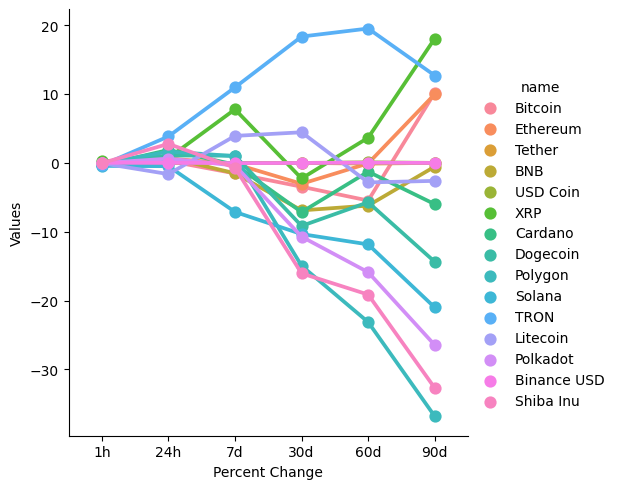

In [54]:
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point').set(xlabel="Percent Change", ylabel="Values")

# We are going to create a dataframe with the columns we want

In [42]:
df7 = df[['name','quote.USD.price','timestamp']]
df7 = df7.query("name == 'Bitcoin'")
df7

,name,quote.USD.price,timestamp
0,Bitcoin,26862.12453,2023-05-22 23:33:38.903284
15,Bitcoin,26858.36814,2023-05-22 23:34:39.321888
30,Bitcoin,26862.10254,2023-05-22 23:35:39.638025
45,Bitcoin,26867.67977,2023-05-22 23:36:42.855730


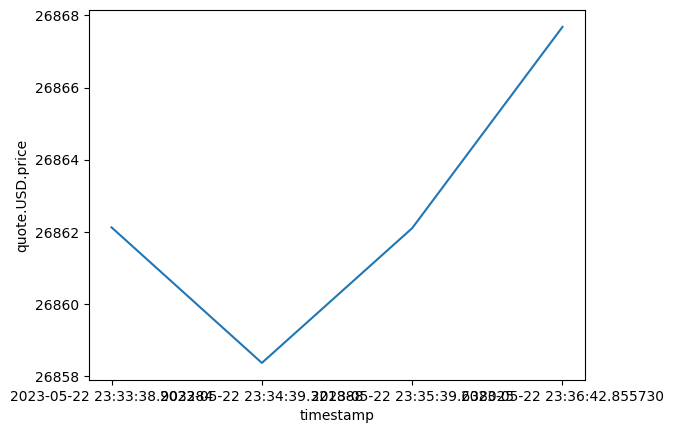

In [43]:
sns.lineplot(x='timestamp', y='quote.USD.price', data = df7);